In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline

In [11]:
raw_data = loadmat('ex6data1.mat')

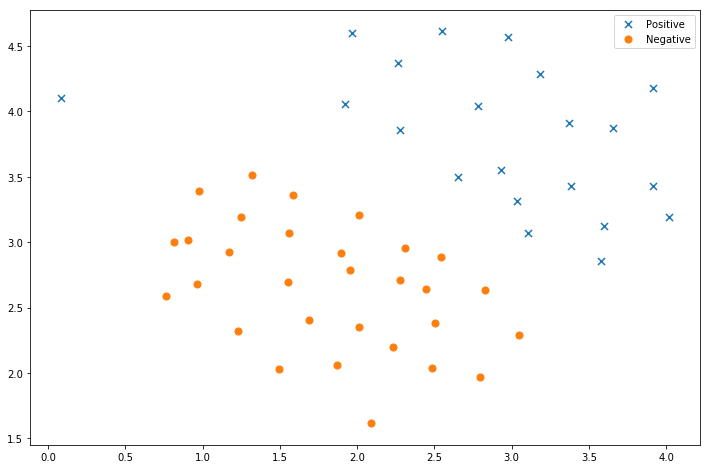

In [12]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend()  

In [13]:
from sklearn import svm  
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000) #notice this is the C that was talked about(1/lambda)
svc  

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [17]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])
#notice it missclassified the outlier

0.98039215686274506

In [22]:
#now lets try it with a big C
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [23]:
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])
#here it did not missclasify the outlier, but this will have high variance as it will not generalize well

0.98039215686274506

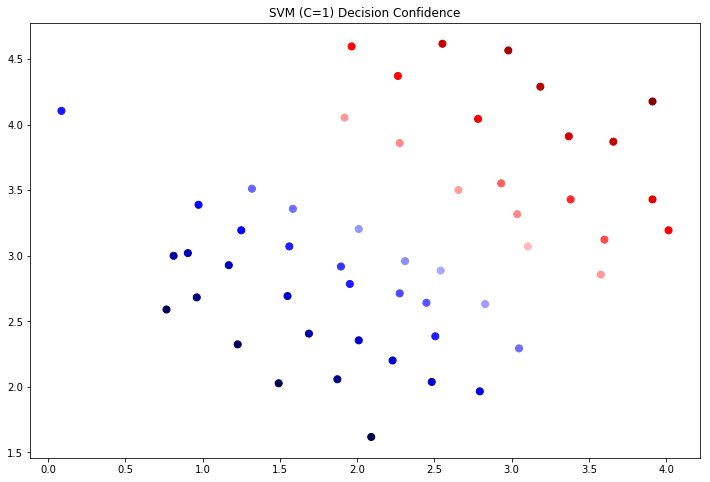

In [20]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')  
ax.set_title('SVM (C=1) Decision Confidence')  

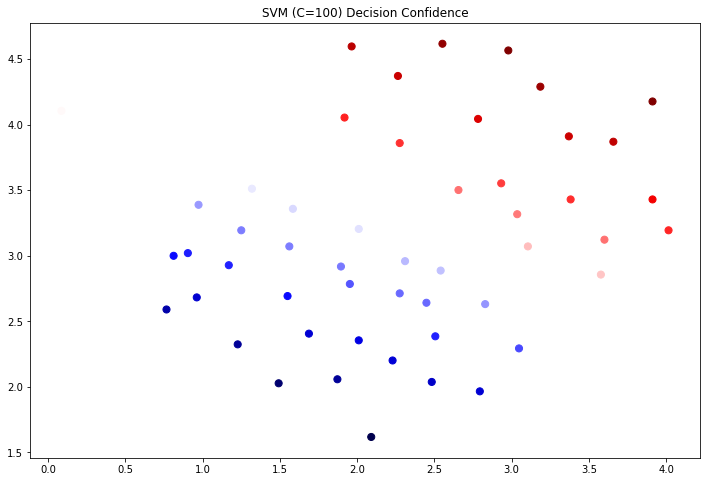

In [24]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')  
ax.set_title('SVM (C=100) Decision Confidence')  

In [31]:
def gaussian_kernel(x1,x2,sigma): 
    inner = -(np.sum(np.power(x1-x2, 2))/(2*np.power(sigma,2)))
    return np.exp(inner)

x1 = np.array([1.0, 2.0, 1.0])  
x2 = np.array([0.0, 4.0, -1.0])  
sigma = 2  

gaussian_kernel(x1, x2, sigma)  

0.32465246735834974

In [35]:
raw_data = loadmat('ex6data2.mat')

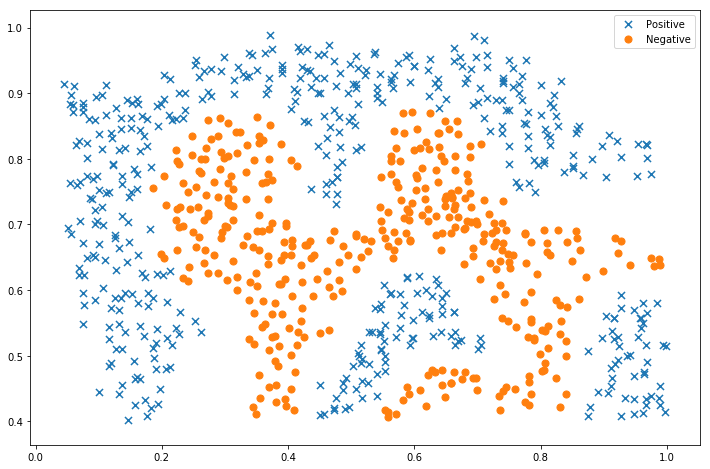

In [36]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend()  

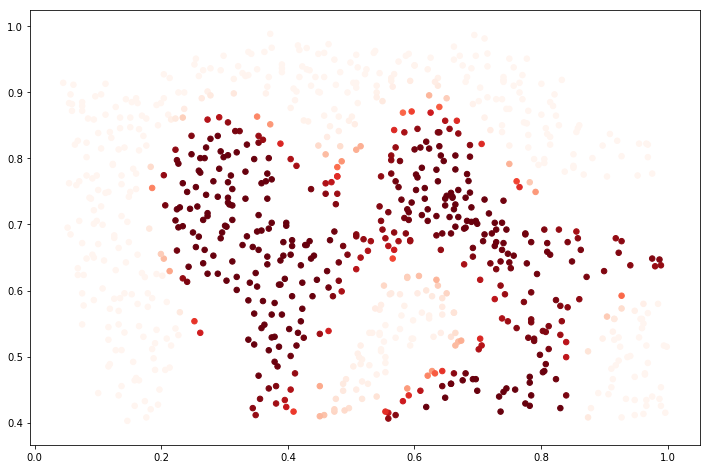

In [38]:
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')  

In [40]:
raw_data = loadmat('ex6data3.mat')

X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]  
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0  
best_params = {'C': None, 'gamma': None}

for C in C_values:  
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params  

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

In [45]:
spam_train = loadmat('spamTrain.mat')  
spam_test = loadmat('spamTest.mat')

spam_test  

{'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011',
 '__version__': '1.0',
 'ytest': array([[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
     

In [48]:
X = spam_train['X']
X_test = spam_test['Xtest']
y = spam_train['y'].ravel()
y_test = spam_test['ytest'].ravel()

X.shape, y.shape, X_test.shape, y_test.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [51]:
svc = svm.SVC()
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
'Test accuracy = {0}%'.format(np.round(svc.score(X_test, y_test) * 100, 2))

'Test accuracy = 95.3%'